<a href="https://colab.research.google.com/github/kyaoNK/bert_nli/blob/main/CREATE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [2]:
!sudo apt -y update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,573 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubu

In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/my-modules')

# Datasets

## JGLUE

In [5]:
import pandas as pd

# RTE

JGLUE_DIR = '/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/JGLUE/datasets/jnli-v1.1/'
JGLUE_FILENAME = { 'train' : 'train-v1.1.json' , 'valid' : 'valid-v1.1.json' }
JGLUE_COLS = [ 'yjcaptions_id', 'sentence1' , 'sentence2' , 'label' ]
COLUMNS = [ 'id', 'sentenceA' , 'sentenceB' , 'label_rte' ]

jglue_rte_train_df = pd.read_json( JGLUE_DIR + JGLUE_FILENAME['train'] , lines=True , encoding='utf-8' )
jglue_rte_train_df = jglue_rte_train_df.loc[ : , JGLUE_COLS ]
jglue_rte_train_df.columns = COLUMNS

jglue_rte_valid_df = pd.read_json( JGLUE_DIR + JGLUE_FILENAME['valid'] , lines=True , encoding='utf-8' )
jglue_rte_valid_df = jglue_rte_valid_df.loc[ : , JGLUE_COLS ]
jglue_rte_valid_df.columns = COLUMNS

# STS

JGLUE_DIR = '/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/JGLUE/datasets/jsts-v1.1/'
JGLUE_FILENAME = { 'train' : 'train-v1.1.json' , 'valid' : 'valid-v1.1.json' }
JGLUE_COLS = [ 'yjcaptions_id' , 'sentence1' , 'sentence2' , 'label' ]
COLUMNS = [ 'id', 'sentenceA' , 'sentenceB' , 'label_sts' ]

jglue_sts_train_df = pd.read_json( JGLUE_DIR + JGLUE_FILENAME['train'] , lines=True , encoding='utf-8' )
jglue_sts_train_df = jglue_sts_train_df.loc[ : , JGLUE_COLS ]
jglue_sts_train_df.columns = COLUMNS

jglue_sts_valid_df = pd.read_json( JGLUE_DIR + JGLUE_FILENAME['valid'] , lines=True , encoding='utf-8' )
jglue_sts_valid_df = jglue_sts_valid_df.loc[ : , JGLUE_COLS ]
jglue_sts_valid_df.columns = COLUMNS

# merge

jglue_rte_df = pd.concat( [ jglue_rte_train_df, jglue_rte_valid_df ] , axis=0 )
jglue_sts_df = pd.concat( [ jglue_sts_train_df, jglue_sts_train_df ] , axis=0 )
jglue_df = pd.merge(jglue_rte_df, jglue_sts_df[['id', 'label_sts']], on='id')

jglue_df

,id,sentenceA,sentenceB,label_rte,label_sts
0,100124-104404-104405,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.8
1,100124-104404-104405,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.8
2,100142-104431-104432,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.0
3,100142-104431-104432,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.0
4,100282-104568-104569,皿の上にサンドイッチが盛られています。,白い皿の上に切られたサンドイッチと野菜料理が載っています。,neutral,2.6
...,...,...,...,...,...
16055,99086-103342-g1967,草原をシマウマの達が走っています。,草原にシマウマたちが止まっています。,contradiction,2.2
16056,99170-103460-103461,テニスラケットをボールに向けています。,右手にラケットを握り、テニスをしている女性がいます。,neutral,2.8
16057,99170-103460-103461,テニスラケットをボールに向けています。,右手にラケットを握り、テニスをしている女性がいます。,neutral,2.8
16058,99856-104139-104143,広場にプロペラ飛行機のオブジェが飾られています。,大きなプロペラ機のオブジェがあります。,neutral,3.4


In [ ]:
# new label
def function(x):
    rte = x['label_rte']
    sts = x['label_sts']
    if rte == 'entailment' :
        if sts >= 4.5 :
            new_label = '正解'
        elif sts >= 3.5 :
            new_label = '異なる修飾'
        elif sts >= 2.5 :
            new_label = '欠如'
        else :
            new_label = '不十分'

    elif rte == 'neutral' :
        if sts >= 4.5 :
            new_label = '正解'
        elif sts >= 1.5 :
            new_label = '無関係'
        else :
            new_label = 'ドメイン外'
            
    elif rte == 'contradiction' :
        if sts >= 3.5 :
            new_label = '異なる修飾'
        else :
            new_label = '矛盾'

    return pd.Series( [ x['label_rte'] , x['label_sts'] , new_label ] )

In [7]:
jglue_label_df = jglue_df[[ 'label_rte' , 'label_sts' ]]

jglue_label_df = jglue_label_df.apply(function, axis=1)
jglue_label_df

,0,1,2
0,neutral,3.8,無関係
1,neutral,3.8,無関係
2,neutral,4.0,無関係
3,neutral,4.0,無関係
4,neutral,2.6,無関係
...,...,...,...
16055,contradiction,2.2,矛盾
16056,neutral,2.8,無関係
16057,neutral,2.8,無関係
16058,neutral,3.4,無関係


In [8]:
def print_freq(label_df):
    s = label_df
    freq = s.value_counts()
    print(freq)

print_freq(jglue_label_df[0])
print_freq(jglue_label_df[1])
print_freq(jglue_label_df[2])

neutral          9768
contradiction    3734
entailment       2558
Name: 0, dtype: int64
3.2    1368
2.8    1242
3.0    1192
3.4    1180
3.6    1086
3.8    1072
2.2     944
2.4     786
2.0     768
4.0     764
1.8     758
2.6     750
1.2     568
1.6     524
1.4     486
4.2     482
1.0     388
0.8     332
4.4     284
4.6     274
0.6     250
5.0     170
4.8     148
0.4     112
0.2      82
0.0      50
Name: 1, dtype: int64
無関係      8608
矛盾       3576
異なる修飾    1464
ドメイン外    1128
欠如        612
正解        592
不十分        80
Name: 2, dtype: int64


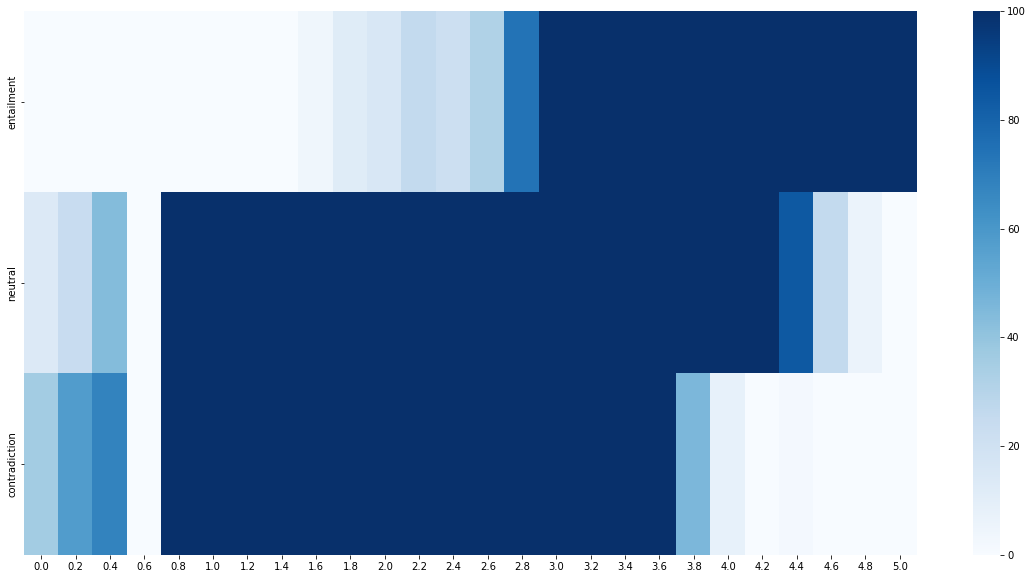

In [10]:
#@title heat map

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

s = jglue_label_df[[0,1]]
freq = s.value_counts()

freq = s.value_counts(sort=True, ascending=True, dropna=False)
freq_df = pd.DataFrame(freq)
freq_df.columns = ['freq']
freq_df = freq_df.sort_index()

sts_range = np.round(np.arange(0, 5.2, 0.2) , 2).tolist()
sts_range = sts_range * 3

rte_range = ['entailment']*26
rte_range.extend( ['neutral']*26)
rte_range.extend( ['contradiction']*26)

df = pd.DataFrame(index=[rte_range, sts_range], columns=['freq'])
df.fillna(0, inplace=True)
df.update(freq_df)
df

freq_2d = [
    df.loc['entailment'].T.values.tolist()[0],
    df.loc['neutral'].T.values.tolist()[0],
    df.loc['contradiction'].T.values.tolist()[0]
]

df_ = pd.DataFrame(data=freq_2d, index=['entailment', 'neutral', 'contradiction'], columns=np.round(np.arange(0, 5.2, 0.2),2))

plt.figure(figsize=(20, 10))
sns.heatmap(df_, cmap='Blues', vmax=100)

In [20]:
#@title write & merge new label
import csv

jglue_label_df = jglue_label_df.rename(columns={2:'label_detail_asag'})
jglue_df_asag = jglue_df.join([jglue_label_df['label_detail_asag']])
jglue_df_asag.to_csv('/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/OUTPUT/dataset_jglue.csv')
jglue_df_asag

,id,sentenceA,sentenceB,label_rte,label_sts,label_detail_asag
0,100124-104404-104405,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.8,無関係
1,100124-104404-104405,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.8,無関係
2,100142-104431-104432,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.0,無関係
3,100142-104431-104432,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.0,無関係
4,100282-104568-104569,皿の上にサンドイッチが盛られています。,白い皿の上に切られたサンドイッチと野菜料理が載っています。,neutral,2.6,無関係
...,...,...,...,...,...,...
16055,99086-103342-g1967,草原をシマウマの達が走っています。,草原にシマウマたちが止まっています。,contradiction,2.2,矛盾
16056,99170-103460-103461,テニスラケットをボールに向けています。,右手にラケットを握り、テニスをしている女性がいます。,neutral,2.8,無関係
16057,99170-103460-103461,テニスラケットをボールに向けています。,右手にラケットを握り、テニスをしている女性がいます。,neutral,2.8,無関係
16058,99856-104139-104143,広場にプロペラ飛行機のオブジェが飾られています。,大きなプロペラ機のオブジェがあります。,neutral,3.4,無関係


## JSICK

In [13]:
import pandas as pd
import csv

def tsv2csv (tsv_filepath) :
    with open(tsv_filepath, 'r') as tsv_f:
        tsv = csv.reader(tsv_f, delimiter = '\t')
        csv_filepath = tsv_filepath[:-4] + '.csv'
        with open(csv_filepath, 'w', newline='\n') as csv_f:
            writer = csv.writer(csv_f, delimiter=",")
            for row in tsv:
                writer.writerow(row)
            return csv_filepath

JSICK_FILE = '/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/JSICK/jsick/jsick-all-annotations.tsv'
JSICK_FILENAME = { 'train' : 'train.tsv' , 'valid' : 'test.tsv' }
JSICK_COLS = [ 'sentence_A_Ja' , 'sentence_B_Ja' , 'entailment_label_Ja' , 'relatedness_score_Ja' ]
COLUMNS = [ 'sentenceA' , 'sentenceB' , 'label_rte' , 'label_sts' ]

jsick_filepath = tsv2csv(JSICK_FILE)
jsick_df = pd.read_csv( jsick_filepath , encoding='utf-8' , header=0 )
jsick_df = jsick_df.loc[ : , JSICK_COLS ]
jsick_df.columns = COLUMNS

jsick_df['label_sts'] = (( jsick_df['label_sts'] / 4) * 5 ) -1 
jsick_df

,sentenceA,sentenceB,label_rte,label_sts
0,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,庭にいる男の子たちのグループが遊んでいて、男性が後ろの方に立っている,neutral,3.625
1,子供たちのグループが家の中で遊んでいて、後ろの方に立っている男性は一人もいない,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,contradiction,1.875
2,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,entailment,4.375
3,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,戸外で遊んでいる男の子は一人もおらず、微笑んでいる男性は一人もいない,contradiction,1.875
4,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,neutral,3.125
...,...,...,...,...
9922,男性が駐車場の中にいて、大きな壁に向かってテニスをしている,スノーボーダーは白い雪の上を大胆に跳んでいる,neutral,0.250
9923,ある人が鍋でオクラをゆでている,男性はそれらのドラムを叩いていない,neutral,0.250
9924,男性は心から歌いながらギターを弾いている,自転車乗りが、あるグループの人々の中で自転車を自分の頭上に持ち上げている,neutral,0.250
9925,青い服を着た男性がミットの中に黄色のボールを持っている,男性が戸外で縄跳びをしている,neutral,0.250


In [14]:
#@title NEW LABEL
jsick_label_df = jsick_df[[ 'label_rte' , 'label_sts' ]]

jsick_label_df = jsick_label_df.apply(function, axis=1)
jsick_label_df

,0,1,2
0,neutral,3.625,無関係
1,contradiction,1.875,矛盾
2,entailment,4.375,異なる修飾
3,contradiction,1.875,矛盾
4,neutral,3.125,無関係
...,...,...,...
9922,neutral,0.250,ドメイン外
9923,neutral,0.250,ドメイン外
9924,neutral,0.250,ドメイン外
9925,neutral,0.250,ドメイン外


In [16]:
print_freq(jsick_label_df[0])
print_freq(jsick_label_df[1])
print_freq(jsick_label_df[2])

neutral          6128
entailment       2179
contradiction    1620
Name: 0, dtype: int64
4.000    1537
2.750    1079
2.125     786
3.125     738
1.500     694
3.625     674
0.250     664
3.375     624
5.250     613
2.375     561
1.875     482
4.375     369
1.125     302
4.875     293
0.625     207
0.875     163
4.625     141
Name: 1, dtype: int64
無関係      4785
異なる修飾    1953
ドメイン外    1331
正解       1045
矛盾        611
欠如        196
不十分         6
Name: 2, dtype: int64


In [23]:
jsick_label_df = jsick_label_df.rename(columns={2:'label_detail_asag'})
jsick_df_asag = jsick_df.join([label_df['label_detail_asag']])
jsick_df_asag

,sentenceA,sentenceB,label_rte,label_sts,label_detail_asag
0,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,庭にいる男の子たちのグループが遊んでいて、男性が後ろの方に立っている,neutral,3.625,無関係
1,子供たちのグループが家の中で遊んでいて、後ろの方に立っている男性は一人もいない,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,contradiction,1.875,矛盾
2,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,entailment,4.375,異なる修飾
3,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,戸外で遊んでいる男の子は一人もおらず、微笑んでいる男性は一人もいない,contradiction,1.875,矛盾
4,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,neutral,3.125,無関係
...,...,...,...,...,...
9922,男性が駐車場の中にいて、大きな壁に向かってテニスをしている,スノーボーダーは白い雪の上を大胆に跳んでいる,neutral,0.250,ドメイン外
9923,ある人が鍋でオクラをゆでている,男性はそれらのドラムを叩いていない,neutral,0.250,ドメイン外
9924,男性は心から歌いながらギターを弾いている,自転車乗りが、あるグループの人々の中で自転車を自分の頭上に持ち上げている,neutral,0.250,ドメイン外
9925,青い服を着た男性がミットの中に黄色のボールを持っている,男性が戸外で縄跳びをしている,neutral,0.250,ドメイン外


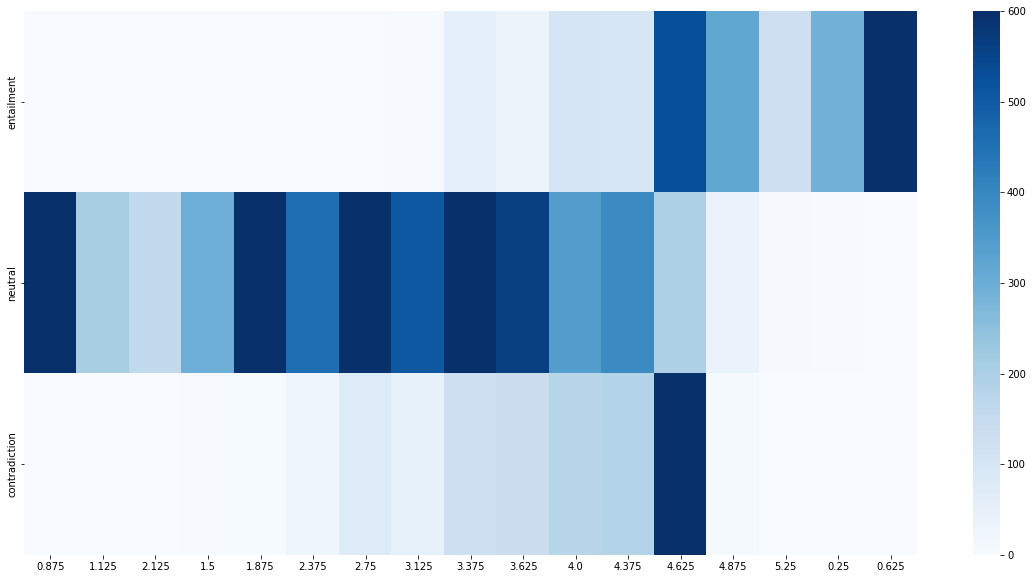

In [24]:
# heat map

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

s = jsick_label_df[[0,1]]
freq = s.value_counts()

freq = s.value_counts(sort=True, ascending=True, dropna=False)
freq_df = pd.DataFrame(freq)
freq_df.columns = ['freq']
freq_df = freq_df.sort_index()
sts_list = freq_df.index.get_level_values(1).tolist()

sts_list = list(set(sts_list))
sts_range = sts_list * 3

rte_range = ['entailment']* (len(sts_list))
rte_range.extend( ['neutral']*(len(sts_list)) )
rte_range.extend( ['contradiction']*(len(sts_list)) )

df = pd.DataFrame(index=[rte_range, sts_range], columns=['freq'])
df.fillna(0, inplace=True)
df.update(freq_df)
df = df.sort_index()

freq_2d = [
    df.loc['entailment'].T.values.tolist()[0],
    df.loc['neutral'].T.values.tolist()[0],
    df.loc['contradiction'].T.values.tolist()[0]
]

df_ = pd.DataFrame(data=freq_2d, index=['entailment', 'neutral', 'contradiction'], columns=sts_list)

plt.figure(figsize=(20, 10))
sns.heatmap(df_, cmap='Blues', vmax=600)

In [25]:
#@title write & merge new label
import csv

jsick_label_df = jsick_label_df.rename(columns={2:'label_detail_asag'})
jsick_df_asag = jsick_df.join([jsick_label_df['label_detail_asag']])
jsick_df_asag.to_csv('/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/OUTPUT/dataset_jsick.csv')
jsick_df_asag

,sentenceA,sentenceB,label_rte,label_sts,label_detail_asag
0,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,庭にいる男の子たちのグループが遊んでいて、男性が後ろの方に立っている,neutral,3.625,無関係
1,子供たちのグループが家の中で遊んでいて、後ろの方に立っている男性は一人もいない,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,contradiction,1.875,矛盾
2,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,entailment,4.375,異なる修飾
3,幼い男の子たちが戸外で遊んでいて、その男性が近くで微笑んでいる,戸外で遊んでいる男の子は一人もおらず、微笑んでいる男性は一人もいない,contradiction,1.875,矛盾
4,子供たちが戸外で遊んでいて、近くに微笑んでいる男性がいる,子供たちのグループが庭で遊んでいて、後ろの方には年を取った男性が立っている,neutral,3.125,無関係
...,...,...,...,...,...
9922,男性が駐車場の中にいて、大きな壁に向かってテニスをしている,スノーボーダーは白い雪の上を大胆に跳んでいる,neutral,0.250,ドメイン外
9923,ある人が鍋でオクラをゆでている,男性はそれらのドラムを叩いていない,neutral,0.250,ドメイン外
9924,男性は心から歌いながらギターを弾いている,自転車乗りが、あるグループの人々の中で自転車を自分の頭上に持ち上げている,neutral,0.250,ドメイン外
9925,青い服を着た男性がミットの中に黄色のボールを持っている,男性が戸外で縄跳びをしている,neutral,0.250,ドメイン外


## Merge JGLUE and JSICK

In [28]:
jglue_jsick_df = pd.concat([jglue_df_asag[jglue_df_asag.columns[jglue_df_asag.columns != 'id']] , jsick_df_asag], axis=0, ignore_index=True)
jglue_jsick_df.to_csv('/content/drive/MyDrive/Colab Notebooks/SeniorThesis/DATASETS/OUTPUT/dataset_jglue_jsick.csv')
jglue_jsick_df

,sentenceA,sentenceB,label_rte,label_sts,label_detail_asag
0,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.80,無関係
1,二人の男性がジャンボジェット機を見ています。,2人の男性が、白い飛行機を眺めています。,neutral,3.80,無関係
2,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.00,無関係
3,男性が子供を抱き上げて立っています。,坊主頭の男性が子供を抱いて立っています。,neutral,4.00,無関係
4,皿の上にサンドイッチが盛られています。,白い皿の上に切られたサンドイッチと野菜料理が載っています。,neutral,2.60,無関係
...,...,...,...,...,...
25982,男性が駐車場の中にいて、大きな壁に向かってテニスをしている,スノーボーダーは白い雪の上を大胆に跳んでいる,neutral,0.25,ドメイン外
25983,ある人が鍋でオクラをゆでている,男性はそれらのドラムを叩いていない,neutral,0.25,ドメイン外
25984,男性は心から歌いながらギターを弾いている,自転車乗りが、あるグループの人々の中で自転車を自分の頭上に持ち上げている,neutral,0.25,ドメイン外
25985,青い服を着た男性がミットの中に黄色のボールを持っている,男性が戸外で縄跳びをしている,neutral,0.25,ドメイン外
